# Real Estate Statistical Analysis
Lirui Guan

## Business Understanding
Real estate investing involves purchase, management and sale or rental of real estate for profit. Property evaluation is preliminary step for real estate investment. This invloves evaluating the property location, physical features of property, the history of property.

King County is located in Washington State. The population was 2,269,675 in the 2020 census, making it the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, also the state's most populous city. There are current 8 fortune 500 companies' head quarters, such as Amazon, Microsoft, Costco, Starbucks, etc,  are located in King County. These factors make King County a very active market for real estate investment.

Fisher Real Estate Investments wants to invest properties in King County. As preliminary evaluation, we wants to understand the most influential physical features of the houses that affect the price of the houses in King County real estate market. 

![](./images/seattle.jpg)

## Data Understanding
The dataset contains more than 30k houses data for 2021-2022 home sales in King County, Washington. The data file is stored `data/kc_house_data.csv`. The description of the column names can be found in `data/column_names.md`. The King County zipcode list is stored in `data/kc_zipcodes.csv`

## Data Preparation

### Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

### Data Exploration

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

### Data Cleaning

In [6]:
# convert date column data type to datetime type
df.date = pd.to_datetime(df.date, yearfirst=True)

In [7]:
# investigate NaN values in dataframe
df.isna().sum()/df.shape[0]

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
dtype: float64

In [8]:
# The number of NaN values in column heat_source and sewer_system is very small compared to the total number of data
# Drop the rows that have NaN values
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  float64       
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  object        
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

In [9]:
# create new column zipcode from address column
df['zipcode'] = df.address.apply(lambda x: x.split(',')[-2].split(' ')[-1])

# check if the zipcode column has unusual values such as xxxxx-xxxx
df.zipcode.apply(lambda x: len(x)).value_counts()

5    30111
Name: zipcode, dtype: int64

In [10]:
# inspect zipcode
df.zipcode.astype('int').describe()

count    30111.000000
mean     96718.496031
std       9125.895473
min       1541.000000
25%      98030.000000
50%      98059.000000
75%      98117.000000
max      99705.000000
Name: zipcode, dtype: float64

In [11]:
# There are some zipcodes that are not belongs to King County, Washington. For example zipcode 99705
df.loc[df.zipcode == '99705']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
16608,629650370,2022-03-14,605000.0,3,2.5,1750,6351,2.0,NO,NO,...,1750,0,410,66,2012,0,"236 Beaver Boulevard, North Pole, Alaska 99705...",64.752684,-147.337806,99705


In [12]:
# After looking for the zipcodes in King county, I have create a csv file that contains all King County zip codes
kc_zipcodes = pd.read_csv('./data/kc_zipcodes.csv')
kc_zipcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   zipcode  131 non-null    int64
dtypes: int64(1)
memory usage: 1.1 KB


In [13]:
# filter out data that is not belong to King County
df = df[df.zipcode.astype('int').isin(kc_zipcodes.zipcode)]

In [14]:
df.shape

(29175, 26)

In [15]:
# drop unecessary columns
df.drop(columns=['id', 'lat', 'long', 'address'], inplace=True)

## Modeling

In [16]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [17]:
# Create two lists that contain the column names for numeric and categorical
# The column price will be the target for the model
numeric = list(df.select_dtypes('number').columns)
numeric.remove('price')
categorical = list(df.select_dtypes('object').columns)
print(numeric)
print(categorical)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated']
['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'zipcode']


In [18]:
df.select_dtypes('object').nunique()

waterfront       2
greenbelt        2
nuisance         2
view             5
condition        5
grade           12
heat_source      7
sewer_system     4
zipcode         78
dtype: int64

### Baseline Model

In [19]:
# create function to generate linear regression and display regression results summary
def OLS_summary(X, y):
    '''
    generate and fit linear regression model
    display the regression results summary
    y: target pandas series
    X: predictors pandas dataframe
    '''
    model = sm.OLS(y, sm.add_constant(X))
    results = model.fit()
    return results.summary()

In [20]:
y = df['price']
X_baseline = df[numeric]
OLS_summary(X_baseline, y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1951.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:31:18   Log-Likelihood:            -4.3320e+05
No. Observations:               29175   AIC:                         8.664e+05
Df Residuals:                   29163   BIC:                         8.665e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.917e+06   3.61e+05     19.178      0.000    6.21e+06    7.62e+06
bedrooms      -1.662e+05   5467.737    -30.402      0.000   -1.77e+05   -1.56e+05
bathrooms      1.418e+05   8101.407     17.500      0.000    1.26e+05    1.58e+05
sqft_living     324.8376     18.217     17.831      0.000     289.131     360.544
sqft_lot         -0.0935      0.067     -1.392      0.164      -0.225       0.038
floors        -2.568e+04   1.01e+04     -2.551      0.011   -4.54e+04   -5949.741
sqft_above      309.8534     18.598     16.661      0.000     273.401     346.306
sqft_basement   165.9054     13.629     12.173      0.000     139.193     192.618
sqft_garage    -125.2048     19.110     -6.552      0.000    -162.662     -87.748
sqft_patio      246.5329     18.005     13.693      0.000     211.243     281.823
yr_built      -3484.1467    186.852    -18.647      0.000   -3850.384   -3117.909
yr_renovated     49.7209      9.944      5.000      0.000      30.229      69.212
==============================================================================
Omnibus:                    41903.093   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51197740.861
Skew:                           8.091   Prob(JB):                         0.00
Kurtosis:                     207.584   Cond. No.                     5.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**interpretate baseline model**
- We define the alpha value is 0.05 in this report
- The baseline model is overall statistically significant. The model explains 42% variance in the sale price of king county houses
- The intercept and most coefficients of the numeric predictors, except the lot sqft, are statistically significant 

### Model Iteration

**Create new features**
- create age, renovated_age and living space ratio features
- By creating new features, the model didn't improve.
- The model is overall statistically significant

In [21]:
# create new column age for the age of the house at the time sold regardless the renovation
df['age'] = df.date.dt.year - df.yr_built
numeric.append('age')

In [22]:
# create renovation feature
df['renovated_age'] = np.where(df.yr_renovated != 0, (df.date.dt.year - df.yr_renovated), \
         (df.date.dt.year - df.yr_built))
numeric.append('renovated_age')

In [23]:
df['renovated_age'].describe()

count    29175.000000
mean        44.775150
std         30.982842
min         -1.000000
25%         18.000000
50%         43.000000
75%         66.000000
max        122.000000
Name: renovated_age, dtype: float64

In [24]:
# replace the age and renovated_age value -1 to 0. These data are those houses were sold in 2021 but built in 2022.
df['renovated_age'] = df.renovated_age.replace(-1, 0)
df['age'] = df.age.replace(-1, 0)

In [25]:
# create living space ratio feature
df['livspace_ratio'] = df.sqft_living / df.sqft_lot
numeric.append('livspace_ratio') 

In [26]:
# Dropped unnecessary columns
df_add_feature = df.drop(columns=['date', 'yr_built', 'yr_renovated'])
numeric.remove('yr_built')
numeric.remove('yr_renovated')

In [27]:
# prepare data for modeling
X_add_feature = df_add_feature.drop(columns=categorical).drop(columns='price')
y_add_feature = df_add_feature.price

In [28]:
OLS_summary(X_add_feature, y_add_feature)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1790.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:31:18   Log-Likelihood:            -4.3320e+05
No. Observations:               29175   AIC:                         8.664e+05
Df Residuals:                   29162   BIC:                         8.665e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.531e+05   2.53e+04     -6.060      0.000   -2.03e+05   -1.04e+05
bedrooms       -1.657e+05   5479.287    -30.235      0.000   -1.76e+05   -1.55e+05
bathrooms       1.431e+05   8135.429     17.585      0.000    1.27e+05    1.59e+05
sqft_living      324.5616     18.232     17.802      0.000     288.826     360.298
sqft_lot          -0.0444      0.068     -0.649      0.516      -0.178       0.090
floors         -5.178e+04   1.24e+04     -4.164      0.000   -7.62e+04   -2.74e+04
sqft_above       317.1644     18.781     16.888      0.000     280.353     353.976
sqft_basement    153.2737     13.793     11.113      0.000     126.239     180.308
sqft_garage     -101.5325     19.844     -5.117      0.000    -140.427     -62.638
sqft_patio       257.5940     18.091     14.239      0.000     222.135     293.053
age             4530.6863    317.503     14.270      0.000    3908.365    5153.007
renovated_age   -599.2725    316.705     -1.892      0.058   -1220.028      21.483
livspace_ratio  7.392e+04   1.86e+04      3.970      0.000    3.74e+04     1.1e+05
==============================================================================
Omnibus:                    41992.669   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51757506.694
Skew:                           8.124   Prob(JB):                         0.00
Kurtosis:                     208.701   Cond. No.                     4.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Add categorical predictors to the model**
- After adding categorical predictors to the model, the model is still overall statistically significant
- We improved the model and now the model explains around 69% variance in the sale price 

In [29]:
# One-hot encoding categorical predictors
df_add_dummy = pd.get_dummies(df_add_feature, columns=categorical, drop_first=True)
X_add_dummy = df_add_dummy.drop(columns='price')

In [30]:
# regression results after adding categorical predictors
OLS_summary(X_add_dummy, y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     542.8
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:31:19   Log-Likelihood:            -4.2409e+05
No. Observations:               29175   AIC:                         8.484e+05
Df Residuals:                   29054   BIC:                         8.494e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.498e+05   3.81e+04     11.812      0.000    3.75e+05    5.24e+05
bedrooms                        -2.413e+04   4288.920     -5.626      0.000   -3.25e+04   -1.57e+04
bathrooms                         4.91e+04   6135.970      8.002      0.000    3.71e+04    6.11e+04
sqft_living                       107.1747     13.925      7.697      0.000      79.882     134.467
sqft_lot                            0.4763      0.054      8.896      0.000       0.371       0.581
floors                           -3.04e+04   9433.627     -3.222      0.001   -4.89e+04   -1.19e+04
sqft_above                        209.9914     14.302     14.683      0.000     181.959     238.024
sqft_basement                      84.4502     10.639      7.937      0.000      63.596     105.304
sqft_garage                       -50.9969     15.454     -3.300      0.001     -81.287     -20.707
sqft_patio                         61.7833     13.774      4.485      0.000      34.786      88.781
age                               576.2408    245.290      2.349      0.019      95.461    1057.021
renovated_age                   -2013.8146    243.492     -8.271      0.000   -2491.071   -1536.558
livspace_ratio                  -2.258e+05   1.58e+04    -14.273      0.000   -2.57e+05   -1.95e+05
waterfront_YES                   7.532e+05   2.72e+04     27.715      0.000       7e+05    8.06e+05
greenbelt_YES                    4893.2744   1.91e+04      0.256      0.798   -3.26e+04    4.24e+04
nuisance_YES                    -4.879e+04   8048.668     -6.062      0.000   -6.46e+04    -3.3e+04
view_EXCELLENT                    7.09e+05   2.75e+04     25.822      0.000    6.55e+05    7.63e+05
view_FAIR                        9.162e+04   3.61e+04      2.535      0.011    2.08e+04    1.62e+05
view_GOOD                        6.668e+04   2.07e+04      3.229      0.001    2.62e+04    1.07e+05
view_NONE                       -8.522e+04   1.26e+04     -6.782      0.000    -1.1e+05   -6.06e+04
condition_Fair                  -1.316e+05   3.41e+04     -3.857      0.000   -1.98e+05   -6.47e+04
condition_Good                   5.482e+04   7561.477      7.250      0.000       4e+04    6.96e+04
condition_Poor                  -2.214e+04   6.67e+04     -0.332      0.740   -1.53e+05    1.09e+05
condition_Very Good              1.226e+05   1.06e+04     11.536      0.000    1.02e+05    1.43e+05
grade_11 Excellent               6.399e+05   2.89e+04     22.115      0.000    5.83e+05    6.97e+05
grade_12 Luxury                  1.508e+06   4.89e+04     30.855      0.000    1.41e+06     1.6e+06
grade_13 Mansion                 3.169e+06   1.06e+05     29.813      0.000    2.96e+06    3.38e+06
grade_2 Substandard             -2.096e+05   5.05e+05     -0.415      0.678    -1.2

**Handle outliers**
- The data may contains outliers that could affect the performance of the model
- By removing the outliers from bedrooms, bathrooms and floors predictors, the model improves
- The model is still overall statistically significant and explains 72.6% variance in sale price

In [31]:
# define a function that plots each numeric predictors vs target
def plot_outlier(col, target):
    '''
    This plots numeric predictor boxplot as well as scatter plot of predictor vs target
    col: pandas dataframe column
    target: pandas series
    '''
    fig, axes = plt.subplots(figsize=(10, 4), ncols=2)
    axes[0].boxplot(col)
    axes[1].scatter(col, target)
    axes[0].set_ylabel(col.name)
    axes[1].set_xlabel(col.name)
    axes[1].set_ylabel(target.name + '($)')
    plt.show()

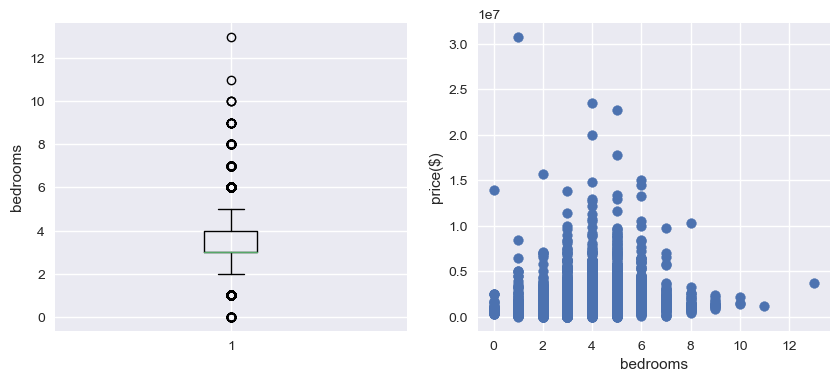

In [32]:
# check outliers in bedrooms predictor
plot_outlier(df_add_dummy['bedrooms'], y)

In [33]:
# remove the data with more than 7 bedrooms
df_remove_outlier = df_add_dummy[df_add_dummy.bedrooms <= 7]
df_remove_outlier.shape

(29119, 121)

In [34]:
# There are several houses with price more than $15,000,000 and one house with 0 bedroom but priced more than $10,000,000. 
# We can remove them since they seem to be luxury and not the main consideratons on our business problem.
df_remove_outlier = df_remove_outlier[df_remove_outlier.price <= 15000000]
df_remove_outlier.drop(df_remove_outlier.loc[(df_remove_outlier.bedrooms == 0) & (df_remove_outlier.price > 10000000)].index, inplace = True)
df_remove_outlier.shape

(29111, 121)

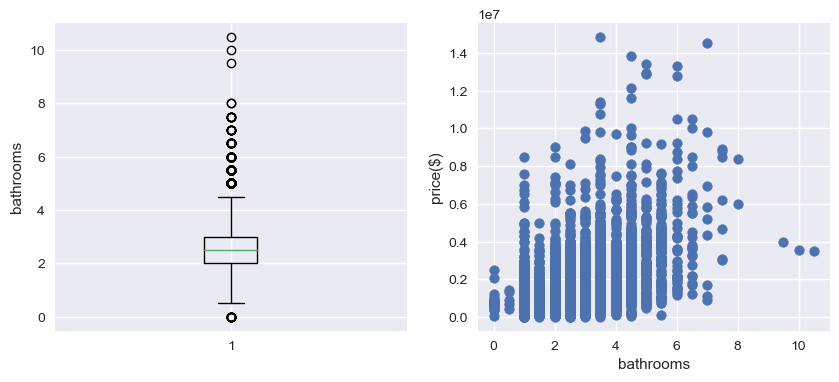

In [35]:
# check outliers in bathrooms predictor
plot_outlier(df_remove_outlier['bathrooms'], df_remove_outlier['price'])

In [36]:
# remove data that contains more than 6 bathrooms
df_remove_outlier = df_remove_outlier[df_remove_outlier.bathrooms <= 6]
df_remove_outlier.shape

(29067, 121)

In [37]:
# prepare data for modeling
X_remove_outlier = df_remove_outlier.drop(columns='price')
y_remove_outlier = df_remove_outlier.price

In [38]:
OLS_summary(X_remove_outlier, y_remove_outlier)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     641.6
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:31:20   Log-Likelihood:            -4.1788e+05
No. Observations:               29067   AIC:                         8.360e+05
Df Residuals:                   28946   BIC:                         8.370e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             4.66e+05   3.28e+04     14.216      0.000    4.02e+05     5.3e+05
bedrooms                        -1.777e+04   3770.930     -4.713      0.000   -2.52e+04   -1.04e+04
bathrooms                        3.766e+04   5336.318      7.058      0.000    2.72e+04    4.81e+04
sqft_living                       154.5721     12.077     12.799      0.000     130.901     178.243
sqft_lot                            0.4873      0.046     10.662      0.000       0.398       0.577
floors                          -1.963e+04   8078.528     -2.430      0.015   -3.55e+04   -3795.437
sqft_above                        161.7000     12.433     13.006      0.000     137.331     186.069
sqft_basement                      55.8123      9.204      6.064      0.000      37.773      73.852
sqft_garage                       -42.6808     13.263     -3.218      0.001     -68.676     -16.685
sqft_patio                         40.6999     11.851      3.434      0.001      17.471      63.928
age                               847.6199    210.167      4.033      0.000     435.682    1259.557
renovated_age                   -2030.2686    208.243     -9.750      0.000   -2438.434   -1622.104
livspace_ratio                   -2.16e+05   1.35e+04    -15.972      0.000   -2.43e+05    -1.9e+05
waterfront_YES                   6.304e+05   2.34e+04     26.925      0.000    5.84e+05    6.76e+05
greenbelt_YES                    1.171e+04   1.63e+04      0.717      0.473   -2.03e+04    4.37e+04
nuisance_YES                    -4.881e+04   6878.135     -7.096      0.000   -6.23e+04   -3.53e+04
view_EXCELLENT                   6.172e+05   2.36e+04     26.156      0.000    5.71e+05    6.63e+05
view_FAIR                        9.862e+04   3.09e+04      3.187      0.001     3.8e+04    1.59e+05
view_GOOD                        6.989e+04   1.76e+04      3.960      0.000    3.53e+04    1.04e+05
view_NONE                       -9.359e+04   1.07e+04     -8.716      0.000   -1.15e+05   -7.25e+04
condition_Fair                  -1.189e+05   2.91e+04     -4.090      0.000   -1.76e+05   -6.19e+04
condition_Good                   5.705e+04   6454.653      8.839      0.000    4.44e+04    6.97e+04
condition_Poor                   -1.68e+04   5.69e+04     -0.295      0.768   -1.28e+05    9.47e+04
condition_Very Good              1.187e+05   9075.250     13.079      0.000    1.01e+05    1.36e+05
grade_11 Excellent               5.668e+05    2.5e+04     22.662      0.000    5.18e+05    6.16e+05
grade_12 Luxury                  1.144e+06   4.38e+04     26.134      0.000    1.06e+06    1.23e+06
grade_13 Mansion                 2.837e+06   1.12e+05     25.220      0.000    2.62e+06    3.06e+06
grade_2 Substandard             -2.773e+05    4.3e+05     -0.645      0.519   -1.12

**Multicollinearity of predictors**
- There are several features are highly correlated.
- By removing one feature from each hightly correlated pair, however, our model does not improve.
- Although it does not improve out model, We will remove one feature from each of the highly correlated pair

In [39]:
# find the features that are highly correlated
df_cc = df_remove_outlier.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cc['pair'] = list(zip(df_cc.level_0, df_cc.level_1))
df_cc.set_index(['pair'], inplace=True)
df_cc.drop(columns=['level_0', 'level_1'], inplace=True)
df_cc.columns = ['cc']
df_cc.drop_duplicates(inplace=True)
df_cc[(df_cc.cc > 0.75) & (df_cc.cc <1)]

,cc
pair,
"(renovated_age, age)",0.908482
"(sqft_living, sqft_above)",0.878380
"(sqft_living, bathrooms)",0.771802


In [40]:
# drop the one feature from each pair that is hightly correlated
df_remove_feature = df_remove_outlier.drop(columns=['sqft_living', 'age'])
numeric = [item for item in numeric if item not in ['sqft_living', 'age']]
X_remove_feature = df_remove_feature.drop(columns='price')
y_remove_feature = df_remove_feature.price

In [41]:
OLS_summary(X_remove_feature, y_remove_feature)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     647.0
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:31:21   Log-Likelihood:            -4.1797e+05
No. Observations:               29067   AIC:                         8.362e+05
Df Residuals:                   28948   BIC:                         8.372e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            5.042e+05   3.27e+04     15.424      0.000     4.4e+05    5.68e+05
bedrooms                        -8067.1868   3709.071     -2.175      0.030   -1.53e+04    -797.237
bathrooms                        5.213e+04   5214.440      9.997      0.000    4.19e+04    6.23e+04
sqft_lot                            0.4945      0.046     10.790      0.000       0.405       0.584
floors                          -3.641e+04   8005.934     -4.547      0.000   -5.21e+04   -2.07e+04
sqft_above                        300.4729      6.384     47.069      0.000     287.961     312.985
sqft_basement                     145.1890      6.187     23.466      0.000     133.062     157.316
sqft_garage                       -79.9350     12.886     -6.203      0.000    -105.193     -54.677
sqft_patio                         51.6435     11.859      4.355      0.000      28.400      74.887
renovated_age                   -1552.0840    146.915    -10.565      0.000   -1840.044   -1264.124
livspace_ratio                  -2.126e+05   1.32e+04    -16.135      0.000   -2.38e+05   -1.87e+05
waterfront_YES                    6.33e+05   2.35e+04     26.966      0.000    5.87e+05    6.79e+05
greenbelt_YES                    1.377e+04   1.64e+04      0.842      0.400   -1.83e+04    4.59e+04
nuisance_YES                    -4.795e+04   6896.982     -6.952      0.000   -6.15e+04   -3.44e+04
view_EXCELLENT                    6.28e+05   2.37e+04     26.547      0.000    5.82e+05    6.74e+05
view_FAIR                        9.959e+04    3.1e+04      3.209      0.001    3.88e+04     1.6e+05
view_GOOD                         7.67e+04   1.77e+04      4.334      0.000     4.2e+04    1.11e+05
view_NONE                       -9.903e+04   1.08e+04     -9.205      0.000    -1.2e+05   -7.79e+04
condition_Fair                  -1.296e+05   2.92e+04     -4.444      0.000   -1.87e+05   -7.24e+04
condition_Good                   6.361e+04   6454.892      9.855      0.000     5.1e+04    7.63e+04
condition_Poor                  -2.667e+04    5.7e+04     -0.468      0.640   -1.38e+05    8.51e+04
condition_Very Good              1.306e+05   9057.095     14.425      0.000    1.13e+05    1.48e+05
grade_11 Excellent               5.782e+05   2.51e+04     23.070      0.000    5.29e+05    6.27e+05
grade_12 Luxury                  1.165e+06   4.39e+04     26.556      0.000    1.08e+06    1.25e+06
grade_13 Mansion                 2.879e+06   1.13e+05     25.531      0.000    2.66e+06     3.1e+06
grade_2 Substandard             -2.657e+05   4.32e+05     -0.616      0.538   -1.11e+06     5.8e+05
grade_3 Poor                    -3.553e+05   1.49e+05     -2.377      0.017   -6.48e+05   -6.23e+04
grade_4 Low                     -3.639e+05   6.71e+04     -5.428      0.000   -4.95

**Data transformation**
- By transforming sqft_lot and livspace_ratio to logarithm values, our model marginally improves
- Now our model explains about 73% variance in price

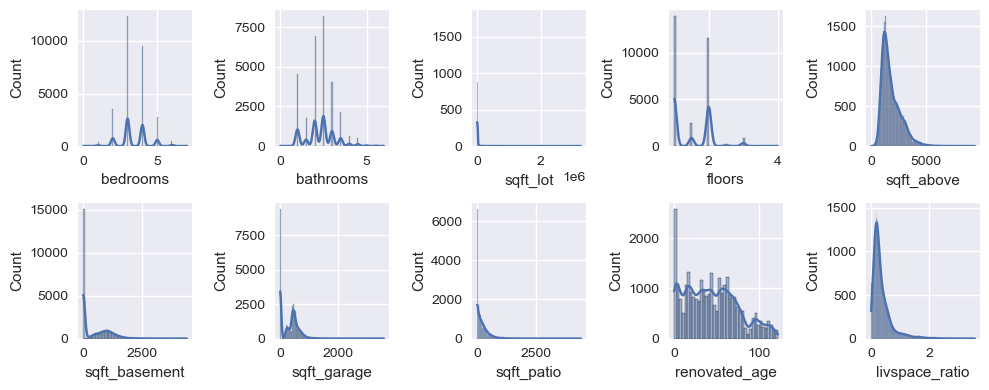

In [42]:
# plot distribution of numeric columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,4))

for i, column in enumerate(df_remove_feature[numeric].columns):
    row = i // 5
    col = i % 5
    ax = axes[row][col]
    sns.histplot(df_remove_feature[column], kde=True, ax=ax)

fig.tight_layout()

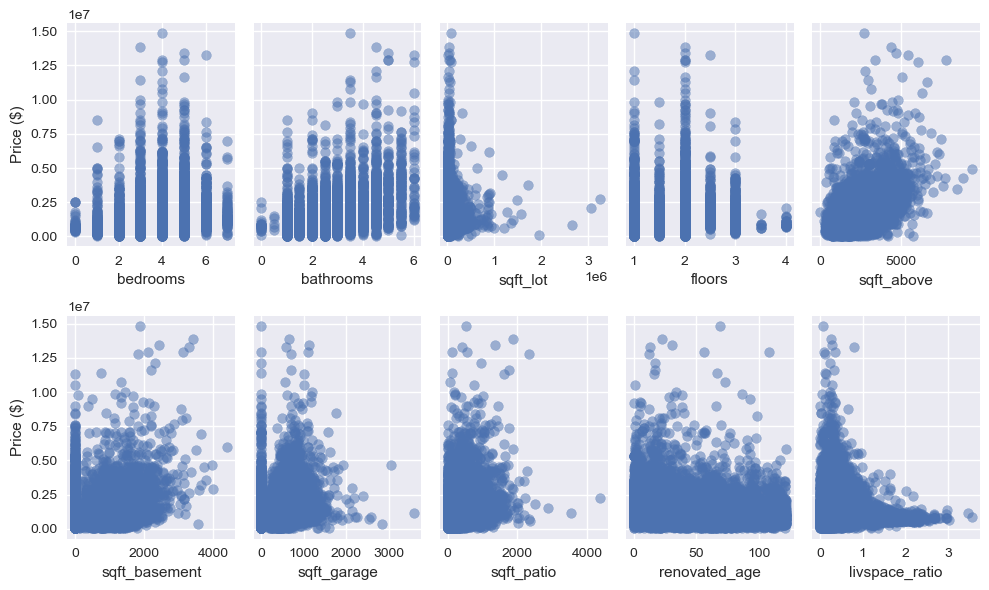

In [43]:
# investigate numeric data for potential log transformation
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,6), sharey=True)

for i, column in enumerate(df_remove_feature[numeric].columns):
    row = i // 5
    col = i % 5
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(df_remove_feature[column], y_remove_feature, alpha=0.5)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("Price ($)")

fig.tight_layout()

In [44]:
df_log = np.log(df_remove_feature['sqft_lot'])

In [45]:
# The livspace_ration and sqft_lot seem good candidates for log transformation
df_remove_feature['log(sqft_lot)'] = df_log

In [46]:
df_trans = df_remove_feature.drop(columns=['sqft_lot'])
numeric.remove('sqft_lot')
numeric.append('log(sqft_lot)')

In [47]:
X_trans = df_trans.drop(columns='price')

In [48]:
y_trans = df_trans.price

In [49]:
OLS_summary(X_trans, y_trans)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     650.7
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:31:42   Log-Likelihood:            -4.1791e+05
No. Observations:               29067   AIC:                         8.361e+05
Df Residuals:                   28948   BIC:                         8.370e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -3.824e+05   6.77e+04     -5.649      0.000   -5.15e+05    -2.5e+05
bedrooms                        -9036.9551   3698.620     -2.443      0.015   -1.63e+04   -1787.490
bathrooms                        5.046e+04   5204.342      9.697      0.000    4.03e+04    6.07e+04
floors                          -3.632e+04   7987.815     -4.547      0.000    -5.2e+04   -2.07e+04
sqft_above                        280.2317      6.552     42.772      0.000     267.390     293.073
sqft_basement                     130.2975      6.275     20.765      0.000     117.998     142.597
sqft_garage                       -73.5131     12.872     -5.711      0.000     -98.742     -48.284
sqft_patio                         36.3261     11.902      3.052      0.002      12.997      59.655
renovated_age                   -1596.5345    146.625    -10.889      0.000   -1883.927   -1309.142
livspace_ratio                  -5.827e+04    1.7e+04     -3.428      0.001   -9.16e+04    -2.5e+04
waterfront_YES                   6.234e+05   2.34e+04     26.601      0.000    5.77e+05    6.69e+05
greenbelt_YES                    1.819e+04   1.63e+04      1.114      0.265   -1.38e+04    5.02e+04
nuisance_YES                    -5.297e+04   6895.180     -7.682      0.000   -6.65e+04   -3.95e+04
view_EXCELLENT                   6.335e+05   2.36e+04     26.828      0.000    5.87e+05     6.8e+05
view_FAIR                        1.049e+05    3.1e+04      3.388      0.001    4.42e+04    1.66e+05
view_GOOD                        7.874e+04   1.77e+04      4.460      0.000    4.41e+04    1.13e+05
view_NONE                         -9.5e+04   1.07e+04     -8.844      0.000   -1.16e+05   -7.39e+04
condition_Fair                  -1.381e+05   2.91e+04     -4.744      0.000   -1.95e+05    -8.1e+04
condition_Good                   6.099e+04   6440.931      9.469      0.000    4.84e+04    7.36e+04
condition_Poor                  -3.765e+04   5.69e+04     -0.661      0.508   -1.49e+05    7.39e+04
condition_Very Good              1.281e+05   9036.838     14.171      0.000     1.1e+05    1.46e+05
grade_11 Excellent               5.808e+05    2.5e+04     23.221      0.000    5.32e+05     6.3e+05
grade_12 Luxury                  1.174e+06   4.38e+04     26.830      0.000    1.09e+06    1.26e+06
grade_13 Mansion                 2.903e+06   1.13e+05     25.788      0.000    2.68e+06    3.12e+06
grade_2 Substandard             -3.456e+05   4.31e+05     -0.802      0.422   -1.19e+06    4.99e+05
grade_3 Poor                     -3.87e+05   1.49e+05     -2.594      0.009   -6.79e+05   -9.46e+04
grade_4 Low                     -3.562e+05   6.69e+04     -5.324      0.000   -4.87e+05   -2.25e+05
grade_5 Fair                    -3.508e+05   2.94e+04    -11.935      0.000   -4.08

### Final Model

In [50]:
# From model iteration, we can set our final model
df_final = df_trans.copy()
X_final = X_trans.copy()
y_final = df_final.price
model_final = sm.OLS(y_final, sm.add_constant(X_final))
results_final = model_final.fit()
results_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     650.7
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:31:42   Log-Likelihood:            -4.1791e+05
No. Observations:               29067   AIC:                         8.361e+05
Df Residuals:                   28948   BIC:                         8.370e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -3.824e+05   6.77e+04     -5.649      0.000   -5.15e+05    -2.5e+05
bedrooms                        -9036.9551   3698.620     -2.443      0.015   -1.63e+04   -1787.490
bathrooms                        5.046e+04   5204.342      9.697      0.000    4.03e+04    6.07e+04
floors                          -3.632e+04   7987.815     -4.547      0.000    -5.2e+04   -2.07e+04
sqft_above                        280.2317      6.552     42.772      0.000     267.390     293.073
sqft_basement                     130.2975      6.275     20.765      0.000     117.998     142.597
sqft_garage                       -73.5131     12.872     -5.711      0.000     -98.742     -48.284
sqft_patio                         36.3261     11.902      3.052      0.002      12.997      59.655
renovated_age                   -1596.5345    146.625    -10.889      0.000   -1883.927   -1309.142
livspace_ratio                  -5.827e+04    1.7e+04     -3.428      0.001   -9.16e+04    -2.5e+04
waterfront_YES                   6.234e+05   2.34e+04     26.601      0.000    5.77e+05    6.69e+05
greenbelt_YES                    1.819e+04   1.63e+04      1.114      0.265   -1.38e+04    5.02e+04
nuisance_YES                    -5.297e+04   6895.180     -7.682      0.000   -6.65e+04   -3.95e+04
view_EXCELLENT                   6.335e+05   2.36e+04     26.828      0.000    5.87e+05     6.8e+05
view_FAIR                        1.049e+05    3.1e+04      3.388      0.001    4.42e+04    1.66e+05
view_GOOD                        7.874e+04   1.77e+04      4.460      0.000    4.41e+04    1.13e+05
view_NONE                         -9.5e+04   1.07e+04     -8.844      0.000   -1.16e+05   -7.39e+04
condition_Fair                  -1.381e+05   2.91e+04     -4.744      0.000   -1.95e+05    -8.1e+04
condition_Good                   6.099e+04   6440.931      9.469      0.000    4.84e+04    7.36e+04
condition_Poor                  -3.765e+04   5.69e+04     -0.661      0.508   -1.49e+05    7.39e+04
condition_Very Good              1.281e+05   9036.838     14.171      0.000     1.1e+05    1.46e+05
grade_11 Excellent               5.808e+05    2.5e+04     23.221      0.000    5.32e+05     6.3e+05
grade_12 Luxury                  1.174e+06   4.38e+04     26.830      0.000    1.09e+06    1.26e+06
grade_13 Mansion                 2.903e+06   1.13e+05     25.788      0.000    2.68e+06    3.12e+06
grade_2 Substandard             -3.456e+05   4.31e+05     -0.802      0.422   -1.19e+06    4.99e+05
grade_3 Poor                     -3.87e+05   1.49e+05     -2.594      0.009   -6.79e+05   -9.46e+04
grade_4 Low                     -3.562e+05   6.69e+04     -5.324      0.000   -4.87e+05   -2.25e+05
grade_5 Fair                    -3.508e+05   2.94e+04    -11.935      0.000   -4.08

In [51]:
# calculate mean average error for the final model
mae = results_final.resid.abs().sum() / len(y_final)
mae

232837.69393658015

### Regression diagnostics
- Linearity
- Multicollinearity of features
- Normality
- Homosecdasticity

**Linearity**
- Rainbow test
    - Our final model has p value of around 1 for rainbow test, so we failed to reject null hypothesis at an alpha of 0.05. This means we consider the relationship to be linear.

In [52]:
from statsmodels.stats.diagnostic import linear_rainbow

In [53]:
linear_rainbow(results_final)

(0.9458950307781564, 0.9995900758751706)

**Multicollinearity**
- From above model iteration, we identified three pairs of predictors are highly correlated. Those pairs are (renovated_age, age), (sqft_above, sqft_living) and (bathrooms, sqft_living)
- Our final model included these pairs since removing those features did not improve our model performance

**Normality**
- Jarque-Bera test
    - Our model summary reports the p value for Jarque-Bera test is close to 0, so we reject the null hypothesis at an alpha of 0.05. This means we do not consider the distribution to be normal.

In [54]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(results_final.resid)

(6611708.700899732, 0.0, 4.3688001513315555, 76.36757291305439)

**Homosecdasticity**
- Goldfeld-Quandt Test
    - The p value of Goldfeld_Quant test is 0.00000006, so we rejected null hypothesis at an alpha of 0.05. This means that we consider the data to be heterosecdastic

In [55]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [56]:
het_goldfeldquandt(y_final, X_final, alternative='two-sided')

(0.9135920654217999, 5.81943640509793e-08, 'two-sided')

## Regression Results

### Interpretation
- The final model overall is statistically significant. It explains about 73% variance in sale price of houses in King County
- The average error is \\$233K when predicts the sale price in King County
- The final data is standard scaled for better interpretation below
- The intercept is statistically significant and is about \\$937K. This means that a house will sell at \\$937K with average bedrooms, bathrooms, floors, square foot space of house apart from basement, square foot of basement, square foot of garage,  square feet patio, renovated age, lot to living space ratio, logarithm square foot of lot, and with no waterfront, no greenbelt, no nuisance, average view, average condition, very good overall grade of the house, electricity as heat source, private sewer system, at zipcode 98001.
- Most coefficients are statistically significant. Only those statistically significant coefficients that are most important are interpreted below.
- The top 5 positive influential physical features on the sale price of a house:
    1. For a house with an overall grade of 13 (mansion) compared to a grade of 10 (very good), we expect the associated price increase of \\$2,903K
    2. For a house with an overall grade of 12 (luxury) compared to a grade of 10 (very good), we expect the associated price increase of \\$1,174K
    3. For a house with excellent view compared to that with average view, we expect the associated price increase of \\$634K
    4. For a house is on waterfront compared to house is not, we expect the associated price increase of \\$623K 
    5. For a house with an overall grade of 11 (excellent) compared to a grade of 10 (very good), we expect the associated price increase of \\$581K
- The top 5 negative influential physical features on the sale price a house:
    1. For a house with private restricted sewer system compared to that with private sewer system, we expect the associated price decrease of \\$471K
    2. For a house with an overall grade of 7 (average) compared to a grade of 10 (very good), we expect the associated price decrease of \\$437K
    3. For a house with an overall grade of 8 (good) compared to a grade of 10 (very good), we expect the associated price decrease of \\$391K
    4. For a house with an overall grade of 3 (poor) compared to a grade of 10 (very good), we expect the associated price decrease of \\$387K
    5. For a house with an overall grade of 6 (low average) compared to a grade of 10 (very good), we expect the associated price decrease of \\$384K
- The top 10 coefficients for zipcodes that are most influential on sale price range from about \\$880K to about \\$3,010K. The coefficients for zipcodes 98039 and 98004 are significant higher than other zipcodes.
    1. For house in zipcode 98039 compared to zipcode 98001, we expect the associated price increase of \\$3,010K
    2. For house in zipcode 98004 compared to zipcode 98001, we expect the associated price increase of \\$2,110K

**Standarize numeric predictors for better interpretation**

In [57]:
df_scaled = df_final.copy()
df_scaled[numeric] = (df_scaled[numeric] - np.mean(df_scaled[numeric])) / np.std(df_scaled[numeric])

In [58]:
# redo the model using scaled data
X_scaled = df_scaled.drop(columns='price')
y_scaled = df_scaled.price
model_scaled = sm.OLS(y_scaled, sm.add_constant(X_scaled))
results_scaled = model_scaled.fit()
results_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     650.7
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:31:43   Log-Likelihood:            -4.1791e+05
No. Observations:               29067   AIC:                         8.361e+05
Df Residuals:                   28948   BIC:                         8.370e+05
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            9.372e+05    2.7e+04     34.740      0.000    8.84e+05     9.9e+05
bedrooms                        -8557.6483   3502.451     -2.443      0.015   -1.54e+04   -1692.684
bathrooms                        4.374e+04   4510.449      9.697      0.000    3.49e+04    5.26e+04
floors                           -1.99e+04   4375.269     -4.547      0.000   -2.85e+04   -1.13e+04
sqft_above                       2.412e+05   5638.265     42.772      0.000     2.3e+05    2.52e+05
sqft_basement                    7.517e+04   3620.006     20.765      0.000    6.81e+04    8.23e+04
sqft_garage                     -2.089e+04   3657.539     -5.711      0.000   -2.81e+04   -1.37e+04
sqft_patio                       8872.7667   2907.180      3.052      0.002    3174.560    1.46e+04
renovated_age                   -4.944e+04   4540.440    -10.889      0.000   -5.83e+04   -4.05e+04
livspace_ratio                  -1.917e+04   5593.071     -3.428      0.001   -3.01e+04   -8211.362
waterfront_YES                   6.234e+05   2.34e+04     26.601      0.000    5.77e+05    6.69e+05
greenbelt_YES                    1.819e+04   1.63e+04      1.114      0.265   -1.38e+04    5.02e+04
nuisance_YES                    -5.297e+04   6895.180     -7.682      0.000   -6.65e+04   -3.95e+04
view_EXCELLENT                   6.335e+05   2.36e+04     26.828      0.000    5.87e+05     6.8e+05
view_FAIR                        1.049e+05    3.1e+04      3.388      0.001    4.42e+04    1.66e+05
view_GOOD                        7.874e+04   1.77e+04      4.460      0.000    4.41e+04    1.13e+05
view_NONE                         -9.5e+04   1.07e+04     -8.844      0.000   -1.16e+05   -7.39e+04
condition_Fair                  -1.381e+05   2.91e+04     -4.744      0.000   -1.95e+05    -8.1e+04
condition_Good                   6.099e+04   6440.931      9.469      0.000    4.84e+04    7.36e+04
condition_Poor                  -3.765e+04   5.69e+04     -0.661      0.508   -1.49e+05    7.39e+04
condition_Very Good              1.281e+05   9036.838     14.171      0.000     1.1e+05    1.46e+05
grade_11 Excellent               5.808e+05    2.5e+04     23.221      0.000    5.32e+05     6.3e+05
grade_12 Luxury                  1.174e+06   4.38e+04     26.830      0.000    1.09e+06    1.26e+06
grade_13 Mansion                 2.903e+06   1.13e+05     25.788      0.000    2.68e+06    3.12e+06
grade_2 Substandard             -3.456e+05   4.31e+05     -0.802      0.422   -1.19e+06    4.99e+05
grade_3 Poor                     -3.87e+05   1.49e+05     -2.594      0.009   -6.79e+05   -9.46e+04
grade_4 Low                     -3.562e+05   6.69e+04     -5.324      0.000   -4.87e+05   -2.25e+05
grade_5 Fair                    -3.508e+05   2.94e+04    -11.935      0.000   -4.08

In [59]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"coeff":coeff,
                               "pvals":pvals,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })
    return results_df

In [60]:
df_scaled_results = results_summary_to_dataframe(results_scaled)

In [61]:
# remove the features that are not statistically significant (p value >= 0.05)
df_scaled_results_ss = df_scaled_results[df_scaled_results.pvals < 0.05]

In [62]:
df_scaled_results_ss

,coeff,pvals,conf_lower,conf_higher
const,937244.684585,4.198058e-259,884364.330395,990125.038774
bedrooms,-8557.648309,1.455829e-02,-15422.612644,-1692.683975
bathrooms,43735.874563,3.370350e-22,34895.188044,52576.561082
floors,-19896.390916,5.451542e-06,-28472.119451,-11320.662380
sqft_above,241161.895255,0.000000e+00,230110.636612,252213.153899
...,...,...,...,...
zipcode_98178,176813.100621,2.879636e-10,121867.339485,231758.861757
zipcode_98188,89883.085822,9.791004e-03,21685.320579,158080.851066
zipcode_98198,87084.826900,1.253412e-03,34186.424885,139983.228915
zipcode_98199,788515.970008,5.511278e-169,733107.834891,843924.105125


In [63]:
# in order to interpretate regression results for categorical predictors, first need to find out which reference 
# column was dropped in dummies
dummy_col = []
for col in df_add_feature.select_dtypes('object').columns:
    for i in df_add_feature[col].value_counts().index:
        dummy_col.append(col + '_' + i)
ref_col = [ref for ref in dummy_col if ref not in df_scaled_results.index]
ref_col

['waterfront_NO',
 'greenbelt_NO',
 'nuisance_NO',
 'view_AVERAGE',
 'condition_Average',
 'grade_10 Very Good',
 'heat_source_Electricity',
 'sewer_system_PRIVATE',
 'zipcode_98001']

In [64]:
df_scaled_coeff = df_scaled_results_ss.drop(labels='const').sort_values(by='coeff')
df_scaled_coeff

,coeff,pvals,conf_lower,conf_higher
sewer_system_PRIVATE RESTRICTED,-4.710634e+05,1.559162e-02,-8.528344e+05,-8.929229e+04
grade_7 Average,-4.369035e+05,1.233229e-151,-4.693581e+05,-4.044489e+05
grade_8 Good,-3.906387e+05,1.375101e-151,-4.196613e+05,-3.616161e+05
grade_3 Poor,-3.869893e+05,9.493337e-03,-6.794091e+05,-9.456947e+04
grade_6 Low Average,-3.841899e+05,3.326531e-82,-4.232737e+05,-3.451061e+05
...,...,...,...,...
grade_12 Luxury,1.174354e+06,1.181461e-156,1.088564e+06,1.260145e+06
zipcode_98040,1.266389e+06,0.000000e+00,1.208216e+06,1.324562e+06
zipcode_98004,2.112973e+06,0.000000e+00,2.053557e+06,2.172388e+06
grade_13 Mansion,2.902591e+06,5.260043e-145,2.681976e+06,3.123205e+06


### The features that are most important to sale price
- The top 5 positive influential features on the sale price of a house are the houses are mansion, luxury or excellent overall grade (grade 11 or above) compared to very good grade (grade 10), has waterfront and excellent view.
- The top 5 negative influential features on the sale price of a house are the houses are poor, low average, average, good grade, compared to very goode grade(grade 10), and has private restricted sewer system.
- The top 10 zipcodes that are most important to sale price are 98119, 98102, 98109, 98105, 98005, 98112, 98033, 98040, 98004, 98039

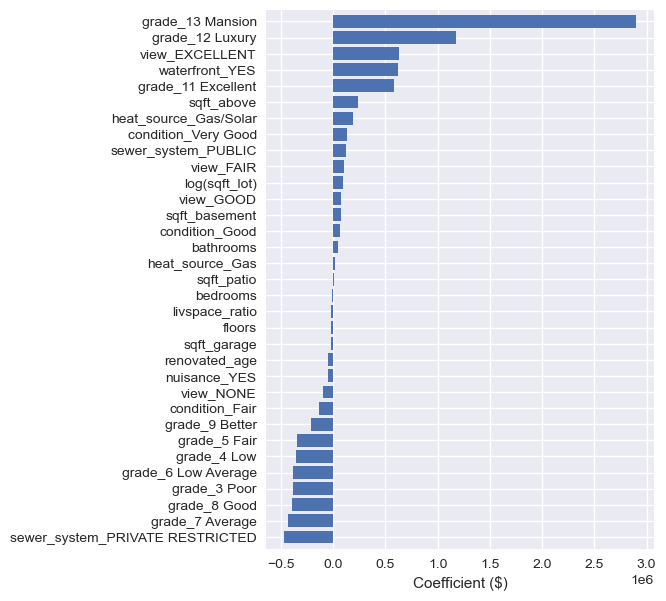

In [65]:
# plot the coefficients without zipcode features
no_zipcode_list = [i for i in df_scaled_coeff.index if 'zipcode' not in i]
df_scaled_coeff_no_zipcode = df_scaled_coeff.loc[no_zipcode_list].sort_values(by='coeff')
fig, ax = plt.subplots(figsize=(5,7))
plt.barh(df_scaled_coeff_no_zipcode.index, df_scaled_coeff_no_zipcode.coeff)
ax.set_xlabel('Coefficient ($)');
plt.margins(y=0.01)

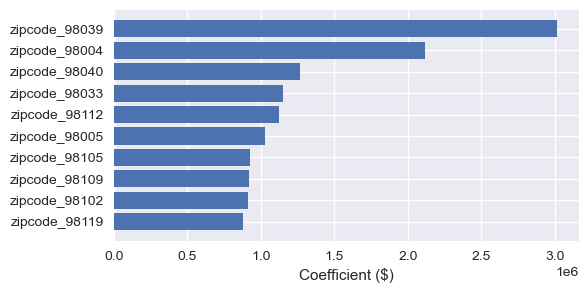

In [66]:
# plot the top 5 coefficients with only zipcode features
zipcode_list = [i for i in df_scaled_coeff.index if 'zipcode' in i]
df_scaled_coeff_zipcode = df_scaled_coeff.loc[zipcode_list].sort_values(by='coeff')
fig, ax = plt.subplots(figsize=(6,3))
plt.barh(df_scaled_coeff_zipcode.index[-10:], df_scaled_coeff_zipcode.coeff[-10:])
ax.set_xlabel('Coefficient ($)');

In [67]:
zipcode_list=[]
for zipcode in df_scaled_coeff_zipcode.coeff[-10:].index:
    zipcode_list.append(int(zipcode[-5:]))
zipcode_list

[98119, 98102, 98109, 98105, 98005, 98112, 98033, 98040, 98004, 98039]

- These top 10 zipcodes can be shown in the [map](https://www.randymajors.com/p/customgmap.html?zips=98119,98102,98109,98105,98005,98112,98033,98040,98004,98039&zipboundary=show&title=Top+10+Zipcodes)
![](./images/top_10_zipcodes_1.jpg)

## Conclusion

This analysis provides the following recommandations to Fisher Real Estate Investemnts when evaluating the most price-impact features of housing in King County market:
- **Location**. The top ten coefficients for zipcodes that are most influential on sale price range from about \\$880K to about \\$3,010K.
- **Great Physical features**. The price of the house will be positively impacted by those with overall high grades (excellent, luxury and mansion), excellent view and on waterfront.
- **Poor Physical features**. The price of the house will be negatively impacted by those with overall lower grades and private restricted sewer system. 

## Next Steps:

- Source addition data such as perceived safety of a neighborhood and the number of services or amenities nearby. These could include data from safety records, walkability of the house, nearby major transit stations, nearby hospitals, nearby schools.